In this analysis , network graph of the entire bike ride data is plotted and based on it, few observations on inter-station connectivity etc are highlighed.  

Data source : https://www.kaggle.com/benhamner/sf-bay-area-bike-share/version/2

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import networkx as nx
from networkx.algorithms.distance_measures import eccentricity, radius , diameter , center
from networkx.algorithms.shortest_paths.generic import all_shortest_paths , shortest_path_length

In [3]:
# Load graph
with open("trip_graph.p", 'rb') as f:  
    trip_graph = pickle.load(f)
##
print("No of stations and total trips : {0} , {1}".format(trip_graph.order() , trip_graph.size(weight = 'n_trips')))  ## No of stations and Number of trips 
print("No of stations and total duration : {0} , {1}".format(trip_graph.order() , trip_graph.size(weight = 'duration')))  ## No of stations and Number of trips 

No of stations and total trips : 70 , 669959.0
No of stations and total duration : 70 , 742280971.0


In [4]:
print(list(trip_graph.edges(data = True))[:5])


[(2, 2, {'n_trips': 191, 'duration': 1724363}), (2, 3, {'n_trips': 448, 'duration': 258472}), (2, 4, {'n_trips': 2200, 'duration': 638922}), (2, 5, {'n_trips': 627, 'duration': 365842}), (2, 6, {'n_trips': 1274, 'duration': 570710})]


Based on the trips between stations, find out the connections between stations.  

In [5]:
connections_per_station = [d for n,d in list(trip_graph.degree())]
connections_per_station = np.array(connections_per_station)
connections_per_station  = connections_per_station *20
connections_per_station 

array([ 760,  700,  660,  660,  640,  680,  680,  700,  660,  680,  640,
        680,  660,  660,  640,  500,  600,  680,  640, 1460, 1600, 1500,
        560,  400,  580,  380,  420,  460,  320,  640,  680,  320,  660,
        600,  520,  460,  480,  400, 1420, 1420, 1440, 1420, 1440, 1400,
       1400, 1420, 1400, 1400, 1400, 1400, 1400, 1400, 1420, 1400, 1420,
       1420, 1400, 1400, 1420, 1400, 1400, 1400, 1420, 1400, 1420, 1400,
       1400, 1400, 1400, 1400])

Select the top 20 stations having the most connections.  

In [6]:
degree_list = list(trip_graph.degree())
## Station having the most trips

max_connections_stations = sorted(degree_list , key = lambda x : x[1] , reverse = True)[0:20]
max_connections_stations

[(70, 80),
 (76, 75),
 (72, 73),
 (56, 72),
 (39, 72),
 (67, 71),
 (63, 71),
 (77, 71),
 (45, 71),
 (54, 71),
 (57, 71),
 (58, 71),
 (61, 71),
 (66, 71),
 (69, 71),
 (41, 70),
 (42, 70),
 (46, 70),
 (47, 70),
 (48, 70)]

In [7]:
max_connections_nodes = [a for a,d in max_connections_stations] 
max_connections_nodes

[70,
 76,
 72,
 56,
 39,
 67,
 63,
 77,
 45,
 54,
 57,
 58,
 61,
 66,
 69,
 41,
 42,
 46,
 47,
 48]

In [8]:
## Station  with least connections 
least_connections_stations = sorted(degree_list , key = lambda x : x[1] )[0:20]
least_connections_stations

[(26, 16),
 (83, 16),
 (23, 19),
 (21, 20),
 (30, 20),
 (24, 21),
 (25, 23),
 (32, 23),
 (27, 24),
 (33, 25),
 (38, 26),
 (31, 28),
 (22, 29),
 (37, 30),
 (36, 30),
 (6, 32),
 (12, 32),
 (28, 32),
 (84, 32),
 (34, 32)]

In [9]:
least_connections_nodes = [a for a,d in least_connections_stations] 
least_connections_nodes

[26, 83, 23, 21, 30, 24, 25, 32, 27, 33, 38, 31, 22, 37, 36, 6, 12, 28, 84, 34]

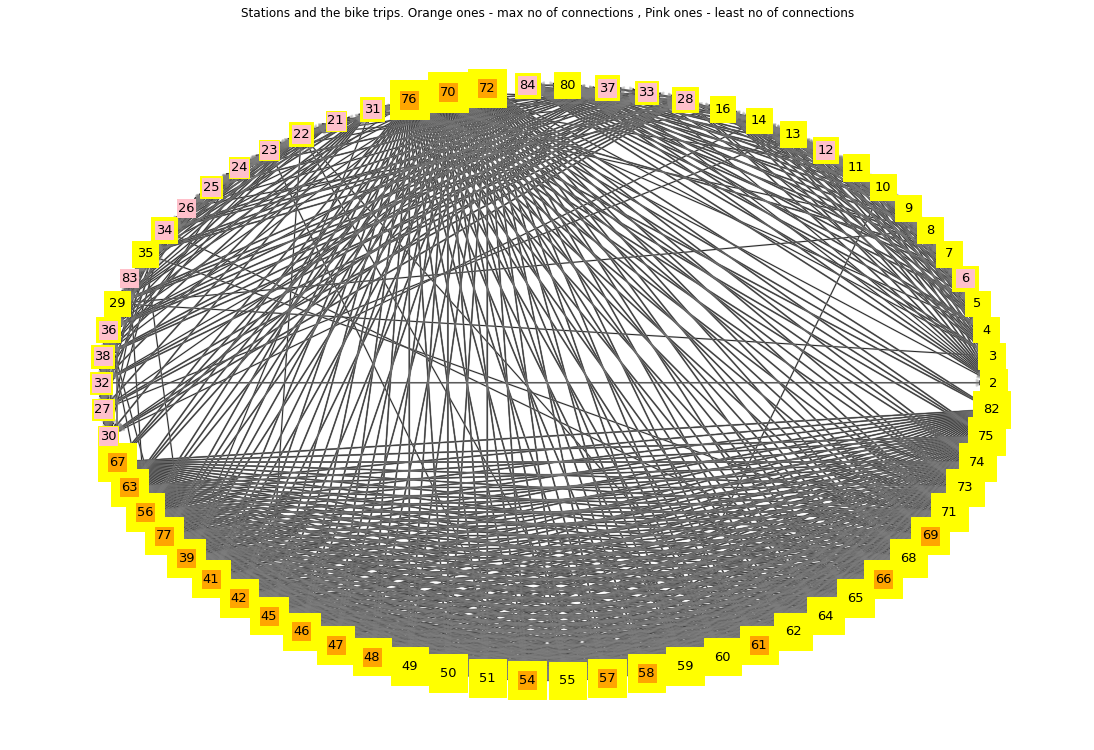

In [26]:
## plot the network graph with most connections stations and least connection stations

plt.figure(figsize = (15,10))
circ_pos = nx.shell_layout(trip_graph) 

#
nx.draw(trip_graph,circ_pos)

#
nx.draw_networkx_nodes(trip_graph, circ_pos,  alpha=1, node_shape = 's', node_size = connections_per_station, node_color = 'yellow')
# highlight the required stations
nx.draw_networkx_nodes(trip_graph, circ_pos, nodelist= max_connections_nodes, node_color='orange', alpha=1, node_shape = 's')
nx.draw_networkx_nodes(trip_graph, circ_pos, nodelist= least_connections_nodes, node_color='pink', alpha=1, node_shape = 's')

# edges
nx.draw_networkx_edges(trip_graph,circ_pos,
                       edgelist=trip_graph.edges(),
                       width=2,alpha=0.3,edge_color='grey', style = 'dashed', arrowsize = 15) ## dashed line not appearing

## node labels 
node_name={}
for node in trip_graph.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(trip_graph, circ_pos,node_name,font_size=13, node_shape = 's', node_size = connections_per_station)
plt.title("Stations and the bike trips. Orange ones - max no of connections , Pink ones - least no of connections")
## edge labels 
#nx.draw_networkx_edge_labels(summed_graph,circ_pos,font_size=16, edge_labels = nx.get_edge_attributes(summed_graph,'Distance'))
plt.show()

In [10]:
periphery_stations = nx.periphery(trip_graph) ## Stations that are maximum connections away from other stations
periphery_stations

[3, 4, 5, 6, 8, 10, 12, 13, 14, 16, 84]

The above stations are furthest away from the rest of the stations based on their connections.  

In [11]:
center_stations = nx.center(trip_graph) ## Stations that are at least connections away rom other stations
center_stations

[29]

In [12]:
print("Diameter :{}".format(nx.diameter(trip_graph)))

Diameter :4


The maximum connections between stations is 4.  

In [13]:
print("Radius :{}".format(nx.radius(trip_graph)))

Radius :2


The least connections between stations is 2.  

In [18]:
nx.get_edge_attributes(trip_graph,'duration')

{(2, 2, 0): 1724363,
 (2, 3, 0): 258472,
 (2, 4, 0): 638922,
 (2, 5, 0): 365842,
 (2, 6, 0): 570710,
 (2, 7, 0): 524106,
 (2, 8, 0): 168893,
 (2, 9, 0): 644274,
 (2, 10, 0): 530961,
 (2, 11, 0): 506622,
 (2, 12, 0): 1487769,
 (2, 13, 0): 392499,
 (2, 14, 0): 19514,
 (2, 16, 0): 325589,
 (2, 28, 0): 249615,
 (2, 33, 0): 12893,
 (2, 37, 0): 75844,
 (2, 80, 0): 29485,
 (2, 84, 0): 319453,
 (3, 2, 0): 410385,
 (3, 3, 0): 4049992,
 (3, 4, 0): 65164,
 (3, 5, 0): 116974,
 (3, 6, 0): 87681,
 (3, 7, 0): 85450,
 (3, 8, 0): 510016,
 (3, 9, 0): 45986,
 (3, 10, 0): 53034,
 (3, 11, 0): 89546,
 (3, 12, 0): 763968,
 (3, 13, 0): 25275,
 (3, 14, 0): 43891,
 (3, 16, 0): 267206,
 (3, 28, 0): 35757,
 (3, 72, 0): 12088,
 (3, 80, 0): 13648,
 (3, 84, 0): 31518,
 (4, 2, 0): 1273669,
 (4, 3, 0): 66307,
 (4, 4, 0): 1495756,
 (4, 5, 0): 31956,
 (4, 6, 0): 81900,
 (4, 7, 0): 103360,
 (4, 8, 0): 84859,
 (4, 9, 0): 29488,
 (4, 10, 0): 54600,
 (4, 11, 0): 30373,
 (4, 12, 0): 163747,
 (4, 13, 0): 27212,
 (4, 14, 0): 1

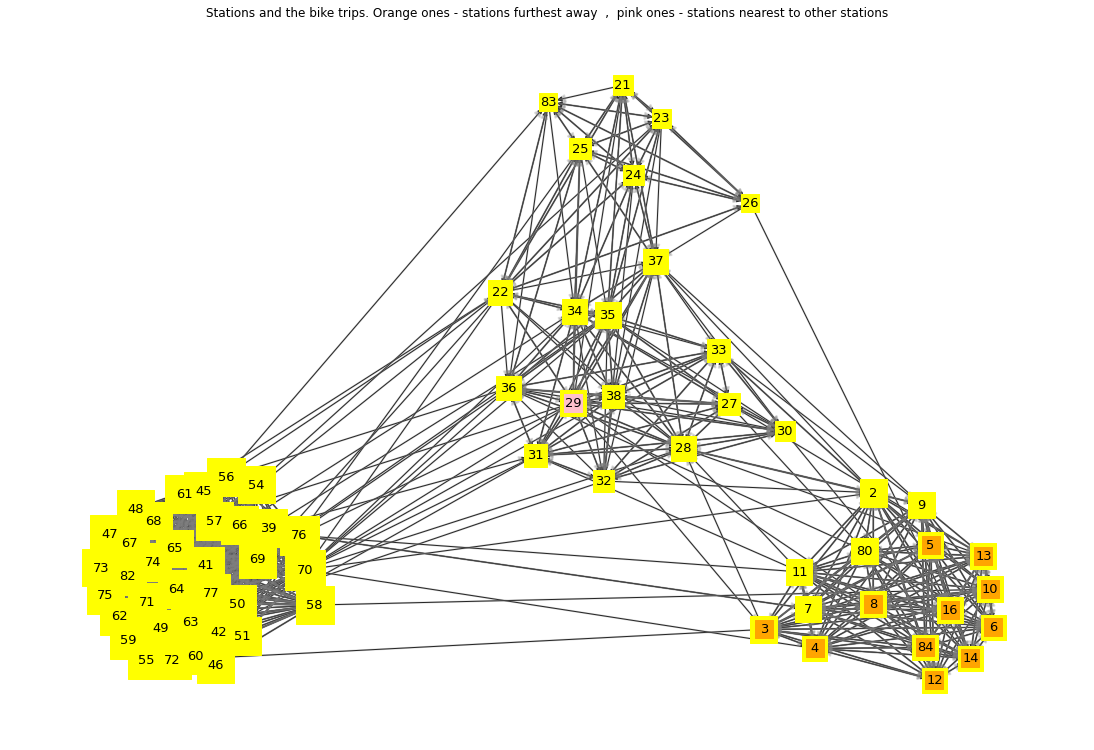

In [34]:
## plot the graph with central station and periphery stations

plt.figure(figsize = (15,10))
circ_pos = nx.spring_layout(trip_graph , seed = 12) 

#
nx.draw(trip_graph,circ_pos)

#highlight the required stations
nx.draw_networkx_nodes(trip_graph, circ_pos,  alpha=1, node_shape = 's', node_size = connections_per_station, node_color = 'yellow')

nx.draw_networkx_nodes(trip_graph, circ_pos, nodelist= periphery_stations, node_color='orange', alpha=1, node_shape = 's')
nx.draw_networkx_nodes(trip_graph, circ_pos, nodelist= center_stations, node_color='pink', alpha=1, node_shape = 's')

# edges
nx.draw_networkx_edges(trip_graph,circ_pos,
                       edgelist=trip_graph.edges(),
                       width=2,alpha=0.3,edge_color='grey', style = 'dashed', arrowsize = 15) ## dashed line not appearing

## node labels 
node_name={}
for node in trip_graph.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(trip_graph, circ_pos,node_name,font_size=13, node_shape = 's', node_size = connections_per_station)
plt.title("Stations and the bike trips. Orange ones - stations furthest away  ,  pink ones - stations nearest to other stations")
## edge labels 
plt.show()

Plot the edge labels for maximum connection nodes.  

In [20]:
trip_dict = nx.get_edge_attributes(trip_graph, 'n_trips')
edge_list = list(trip_dict.keys())
edge_list = [ (i[0],i[1]) for i in edge_list]
edge_list

[(2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 16),
 (2, 28),
 (2, 33),
 (2, 37),
 (2, 80),
 (2, 84),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 16),
 (3, 28),
 (3, 72),
 (3, 80),
 (3, 84),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 16),
 (4, 70),
 (4, 80),
 (4, 84),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 16),
 (5, 33),
 (5, 80),
 (5, 84),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 16),
 (6, 80),
 (6, 84),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (7, 12),
 (7, 13),
 (7, 14),
 (7, 16),
 (7, 76),
 (7, 80),
 (7, 84),
 (8, 2),

In [21]:
trip_list = list(trip_dict.values())
trip_list

[191,
 448,
 2200,
 627,
 1274,
 1007,
 228,
 634,
 519,
 808,
 190,
 595,
 35,
 392,
 3,
 1,
 1,
 23,
 382,
 381,
 391,
 118,
 53,
 107,
 55,
 36,
 29,
 92,
 101,
 54,
 22,
 49,
 51,
 4,
 1,
 9,
 41,
 2283,
 78,
 198,
 32,
 49,
 106,
 51,
 26,
 32,
 44,
 330,
 16,
 554,
 37,
 1,
 10,
 14,
 687,
 49,
 37,
 78,
 45,
 74,
 30,
 17,
 33,
 49,
 57,
 24,
 29,
 34,
 1,
 9,
 4,
 1172,
 122,
 44,
 34,
 197,
 139,
 93,
 260,
 117,
 111,
 47,
 154,
 105,
 60,
 100,
 162,
 695,
 59,
 88,
 59,
 133,
 149,
 162,
 222,
 70,
 136,
 50,
 97,
 44,
 220,
 1,
 5,
 43,
 261,
 51,
 34,
 15,
 135,
 126,
 160,
 70,
 101,
 435,
 88,
 55,
 30,
 105,
 3,
 6,
 17,
 438,
 62,
 64,
 30,
 252,
 110,
 92,
 230,
 133,
 151,
 41,
 72,
 35,
 31,
 2,
 46,
 121,
 716,
 118,
 37,
 65,
 109,
 144,
 435,
 127,
 229,
 142,
 80,
 48,
 21,
 88,
 19,
 15,
 806,
 71,
 42,
 31,
 97,
 90,
 85,
 201,
 85,
 178,
 66,
 61,
 17,
 150,
 2,
 1,
 14,
 37,
 125,
 58,
 228,
 32,
 58,
 54,
 79,
 44,
 43,
 67,
 110,
 89,
 20,
 133,
 9,
 21,


In [32]:
## create the edge label dictionary with the two lists above by selecting the starting stations that are in max connection stations.
edge_lbl = {}
for i in range(len(edge_list)):
    if edge_list[i][0] in max_connections_nodes:
        edge_lbl[edge_list[i]] = trip_list[i]
##
edge_lbl

{(72, 39): 614,
 (72, 41): 219,
 (72, 42): 67,
 (72, 45): 191,
 (72, 46): 181,
 (72, 47): 195,
 (72, 48): 116,
 (72, 49): 69,
 (72, 50): 241,
 (72, 51): 37,
 (72, 54): 80,
 (72, 55): 463,
 (72, 56): 304,
 (72, 57): 346,
 (72, 58): 145,
 (72, 59): 420,
 (72, 60): 605,
 (72, 61): 128,
 (72, 62): 148,
 (72, 63): 167,
 (72, 64): 234,
 (72, 65): 2672,
 (72, 66): 1045,
 (72, 67): 884,
 (72, 68): 147,
 (72, 69): 501,
 (72, 70): 811,
 (72, 71): 212,
 (72, 72): 436,
 (72, 73): 173,
 (72, 74): 393,
 (72, 75): 198,
 (72, 76): 865,
 (72, 77): 709,
 (72, 82): 86,
 (70, 2): 1,
 (70, 29): 1,
 (70, 39): 1406,
 (70, 41): 1294,
 (70, 42): 1700,
 (70, 45): 794,
 (70, 46): 317,
 (70, 47): 755,
 (70, 48): 1288,
 (70, 49): 1216,
 (70, 50): 3622,
 (70, 51): 3031,
 (70, 54): 1678,
 (70, 55): 3510,
 (70, 56): 1172,
 (70, 57): 1262,
 (70, 58): 181,
 (70, 59): 404,
 (70, 60): 1494,
 (70, 61): 1690,
 (70, 62): 1313,
 (70, 63): 2168,
 (70, 64): 1130,
 (70, 65): 2320,
 (70, 66): 749,
 (70, 67): 1579,
 (70, 68): 209

In [25]:
max_connections_nodes

[70,
 76,
 72,
 56,
 39,
 67,
 63,
 77,
 45,
 54,
 57,
 58,
 61,
 66,
 69,
 41,
 42,
 46,
 47,
 48]

In [33]:
## sort and select the top 10 total trips 
edge_lbl_sorted = dict(sorted(edge_lbl.items(), key=lambda item: item[1] , reverse = True))
edge_lbl_sorted

{(69, 65): 6216,
 (61, 50): 4839,
 (70, 50): 3622,
 (70, 55): 3510,
 (69, 39): 3438,
 (77, 64): 3427,
 (67, 70): 3190,
 (70, 51): 3031,
 (69, 57): 3005,
 (61, 74): 2877,
 (70, 74): 2866,
 (39, 69): 2854,
 (76, 70): 2797,
 (72, 65): 2672,
 (70, 77): 2598,
 (67, 76): 2540,
 (77, 70): 2408,
 (63, 70): 2394,
 (70, 65): 2320,
 (57, 70): 2311,
 (69, 67): 2230,
 (70, 63): 2168,
 (70, 68): 2097,
 (39, 67): 2087,
 (67, 69): 2083,
 (76, 67): 2061,
 (54, 70): 2054,
 (56, 70): 2042,
 (39, 70): 1852,
 (67, 39): 1732,
 (57, 69): 1732,
 (70, 42): 1700,
 (70, 61): 1690,
 (70, 54): 1678,
 (42, 70): 1594,
 (70, 67): 1579,
 (41, 70): 1575,
 (77, 50): 1549,
 (61, 70): 1510,
 (70, 60): 1494,
 (61, 77): 1493,
 (54, 50): 1486,
 (48, 74): 1449,
 (77, 61): 1443,
 (69, 50): 1434,
 (70, 39): 1406,
 (69, 51): 1406,
 (77, 60): 1321,
 (54, 60): 1318,
 (70, 62): 1313,
 (77, 69): 1303,
 (69, 77): 1300,
 (70, 41): 1294,
 (70, 48): 1288,
 (70, 57): 1262,
 (66, 72): 1258,
 (56, 82): 1254,
 (69, 63): 1240,
 (70, 49): 121

In [34]:
## first 10 top trips 
top_10 = list(edge_lbl_sorted.keys())[:10]
edge_lbl_10 = { n : edge_lbl[n] for n in top_10}
edge_lbl_10

{(69, 65): 6216,
 (61, 50): 4839,
 (70, 50): 3622,
 (70, 55): 3510,
 (69, 39): 3438,
 (77, 64): 3427,
 (67, 70): 3190,
 (70, 51): 3031,
 (69, 57): 3005,
 (61, 74): 2877}

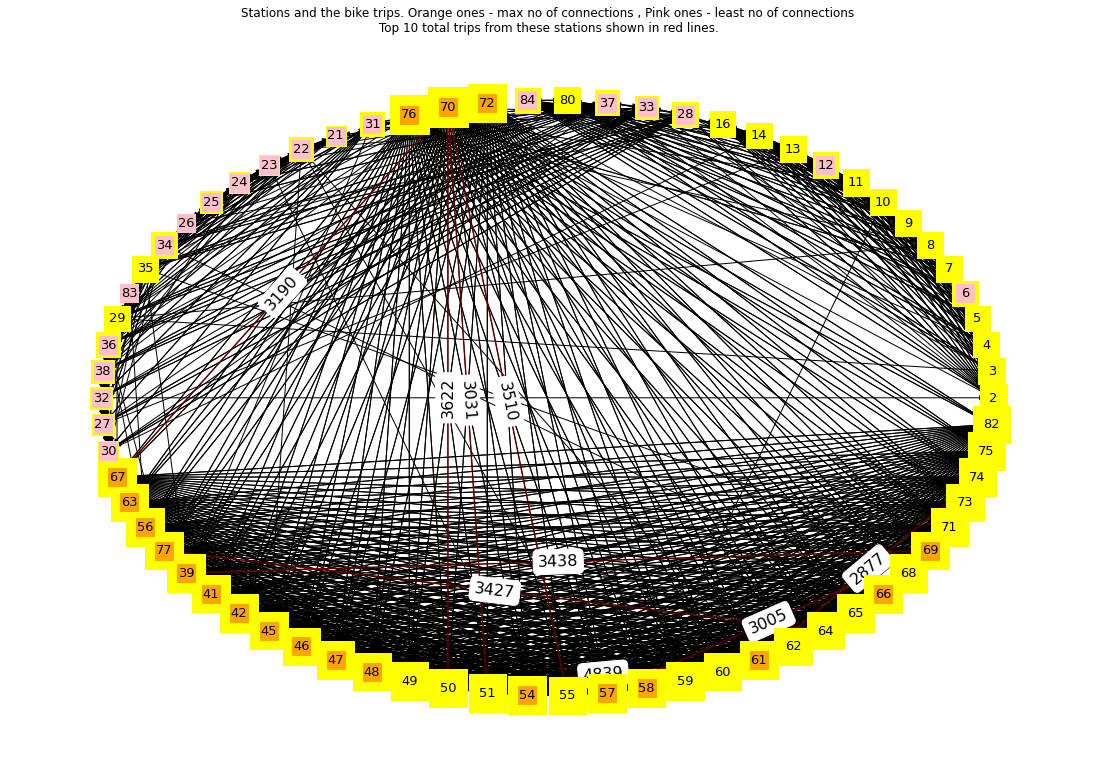

In [43]:
## plot the max and least trips - shell layout 

plt.figure(figsize = (15,10))
circ_pos = nx.shell_layout(trip_graph ) 

#Use the networkx draw function to easily visualise the graph
nx.draw(trip_graph,circ_pos)

#highlight the central airports and those in periphery 
nx.draw_networkx_nodes(trip_graph, circ_pos,  alpha=1, node_shape = 's', node_size = connections_per_station, node_color = 'yellow')

nx.draw_networkx_nodes(trip_graph, circ_pos, nodelist= max_connections_nodes, node_color='orange', alpha=1, node_shape = 's')
nx.draw_networkx_nodes(trip_graph, circ_pos, nodelist= least_connections_nodes, node_color='pink', alpha=1, node_shape = 's')

# edges
nx.draw_networkx_edges(trip_graph,circ_pos,
                       edgelist= edge_lbl_10.keys(),
                       width=2,alpha=0.3,edge_color='red', style = 'dashed', arrowsize = 15) ## dashed line not appearing

## node labels 
node_name={}
for node in trip_graph.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(trip_graph, circ_pos,node_name,font_size=13, node_shape = 's', node_size = connections_per_station)
plt.title("Stations and the bike trips. Orange ones - max no of connections , Pink ones - least no of connections\n Top 10 total trips from these stations shown in red lines.")
## edge labels 
nx.draw_networkx_edge_labels(trip_graph,circ_pos,font_size=16, edge_labels = edge_lbl_10, label_pos = 0.5 )
#nx.draw_networkx_edge_labels(trip_graph,circ_pos,font_size=16, edge_labels = edge_labels_max, label_pos = 0.5)
plt.show()